## Project Data Preprocessing

In [31]:
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv("training_data_fall2024.csv")

In [33]:
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


'increase_stock', 'snow', 'holiday', 'summertime' are the only categorical feature we will be dealing with

In [36]:
data.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.0,0.042713,13.082500,64.322375,15.344125
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.0,0.421198,7.756652,32.748869,2.323737
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.0,0.000000,7.500000,28.800000,16.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.0,0.000000,12.300000,79.300000,16.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.0,0.000000,17.600000,92.800000,16.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,0.0,6.710000,43.800000,100.000000,16.000000


In [37]:
# Check for missing data
missing_data = data.isnull().sum()
print(missing_data)
#No need to fill missing values

hour_of_day       0
day_of_week       0
month             0
holiday           0
weekday           0
summertime        0
temp              0
dew               0
humidity          0
precip            0
snow              0
snowdepth         0
windspeed         0
cloudcover        0
visibility        0
increase_stock    0
dtype: int64


In [38]:
data['snow'].unique()
# Drop the 'snow' column because it provides no additional information
data = data.drop('snow', axis=1)

In [39]:
data['increase_stock'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

In [40]:
data.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0.0,16.3,31.6,16.0,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0.0,23.9,85.7,16.0,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0.0,0.0,81.1,16.0,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0.0,19.2,0.0,16.0,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0.0,10.5,44.6,16.0,0


In [41]:
# Rush Hour (7 AM - 9 AM, 4 PM - 6 PM)
#IF ANYONE WANTS TO CHANGE THIS, FEEL FREE
data['rush_hour'] = data['hour_of_day'].apply(lambda x: 1 if (7 <= x <= 9) else (2 if (16 <= x <= 18) else 0))

# Season (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter)
def get_season(month):
    if month in [3, 4, 5]: return 1  # Spring
    elif month in [6, 7, 8]: return 2  # Summer
    elif month in [9, 10, 11]: return 3  # Fall
    else: return 4  # Winter
data['season'] = data['month'].apply(get_season)

# Period of the day (Night, Morning, Afternoon, Evening, Late Night)
def get_period(hour_of_day):
    if hour_of_day in range(0, 7): return 0  # Night (12 AM - 6 AM)
    elif hour_of_day in range(7, 12): return 1  # Morning (7 AM - 11 AM)
    elif hour_of_day in range(12, 17): return 2  # Afternoon (12 PM - 4 PM)
    elif hour_of_day in range(17, 21): return 3  # Evening (5 PM - 8 PM)
    else: return 4  # Late Night (9 PM - 11 PM)

data['period_of_day'] = data['hour_of_day'].apply(get_period)

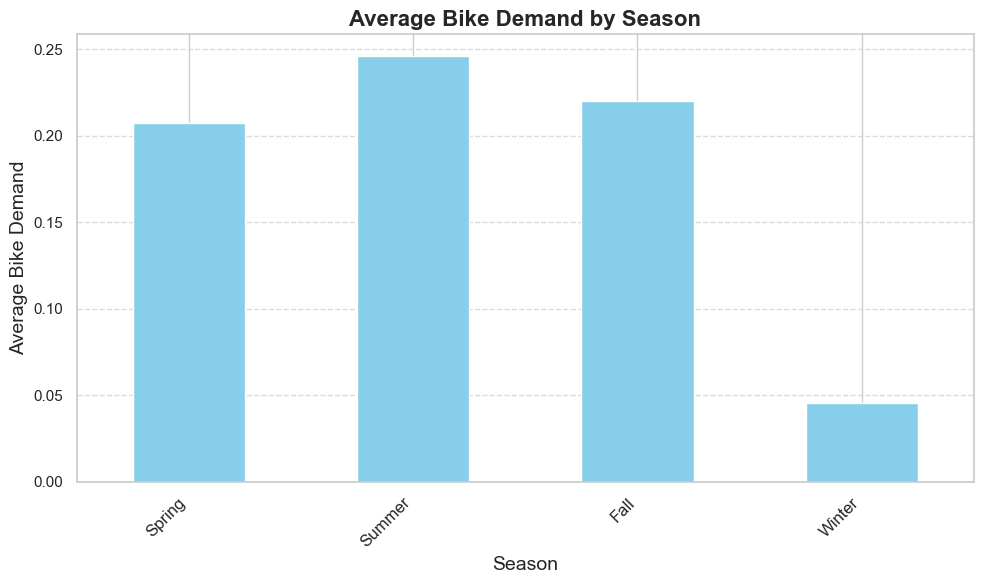

In [42]:
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

sns.set(style="whitegrid")
ax = data.groupby('season')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(season_labels)), labels=season_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

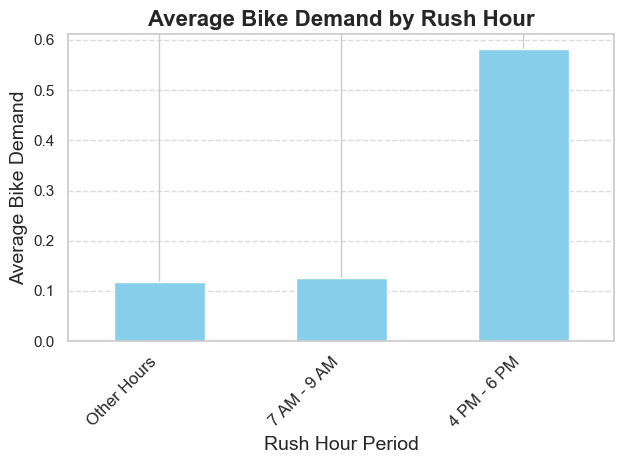

In [43]:
#IF ANYONE WANTS TO CHANGE THIS, FEEL FREE

day_labels = ['Other Hours', '7 AM - 9 AM', '4 PM - 6 PM']

sns.set(style="whitegrid")
ax = data.groupby('rush_hour')['increase_stock'].mean().plot(kind='bar', color='skyblue', title='Average increase_stock Value by Rush Hour')
plt.title('Average Bike Demand by Rush Hour', fontsize=16, fontweight='bold')
plt.xlabel('Rush Hour Period', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(day_labels)), labels=day_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

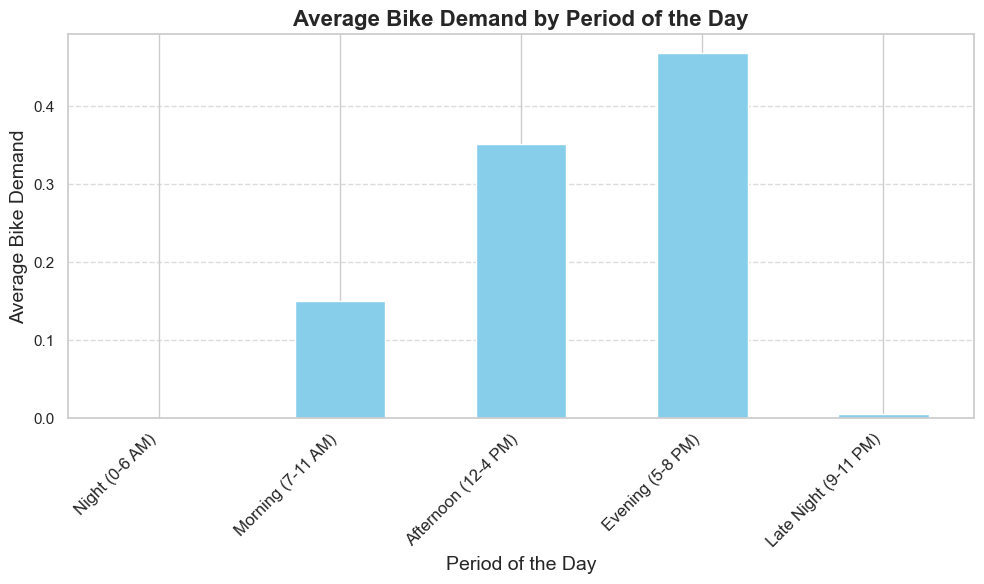

In [44]:
period_labels = ['Night (0-6 AM)', 'Morning (7-11 AM)', 'Afternoon (12-4 PM)', 'Evening (5-8 PM)', 'Late Night (9-11 PM)']

sns.set(style="whitegrid")
ax = data.groupby('period_of_day')['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Period of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Period of the Day', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(period_labels)), labels=period_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [45]:
data.describe()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock,rush_hour,season,period_of_day
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,3.022500,6.468750,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.042713,13.082500,64.322375,15.344125,0.180000,0.388750,2.475625,1.610000
std,6.94837,2.012965,3.454741,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.421198,7.756652,32.748869,2.323737,0.384308,0.705645,1.126476,1.374438
min,0.00000,0.000000,1.000000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,1.000000,0.000000
25%,5.00000,1.000000,3.000000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.000000,7.500000,28.800000,16.000000,0.000000,0.000000,1.000000,0.000000
50%,12.00000,3.000000,6.000000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.000000,12.300000,79.300000,16.000000,0.000000,0.000000,2.000000,2.000000
75%,17.00000,5.000000,9.000000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.000000,17.600000,92.800000,16.000000,0.000000,1.000000,3.000000,3.000000
max,23.00000,6.000000,12.000000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,6.710000,43.800000,100.000000,16.000000,1.000000,2.000000,4.000000,4.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snowdepth       1600 non-null   float64
 11  windspeed       1600 non-null   float64
 12  cloudcover      1600 non-null   float64
 13  visibility      1600 non-null   float64
 14  increase_stock  1600 non-null   int64  
 15  rush_hour       1600 non-null   int64  
 16  season          1600 non-null   int64  
 17  period_of_day   1600 non-null   i

In [47]:
# Rolling mean and std based on the most correlated features to the target
#data['temp_rolling_mean'] = data.groupby(['month', 'hour_of_day'])['temp'].rolling(window=3, min_periods=1).mean().reset_index(level=[0, 1], drop=True)
#data['temp_rolling_std'] = data.groupby(['month', 'hour_of_day'])['temp'].rolling(window=3, min_periods=1).std().reset_index(level=[0, 1], drop=True)
#data['humidity_rolling_mean'] = data.groupby(['month', 'hour_of_day'])['humidity'].rolling(window=3, min_periods=1).mean().reset_index(level=[0, 1], drop=True)
#data['humidity_rolling_std'] = data.groupby(['month', 'hour_of_day'])['humidity'].rolling(window=3, min_periods=1).std().reset_index(level=[0, 1], drop=True)

data.shape

(1600, 18)

In [48]:
data = data.dropna()
data.shape

(1600, 18)

In [49]:
data.head(10)

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock,rush_hour,season,period_of_day
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0.0,16.3,31.6,16.0,0,0,4,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0.0,23.9,85.7,16.0,0,0,4,4
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0.0,0.0,81.1,16.0,0,0,2,4
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0.0,19.2,0.0,16.0,0,0,4,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0.0,10.5,44.6,16.0,0,2,1,3
5,17,3,3,0,1,1,27.1,12.8,40.98,0.0,0.0,13.6,81.3,16.0,1,2,1,3
6,20,4,7,0,1,1,30.9,24.3,67.71,0.0,0.0,20.3,50.3,16.0,0,0,2,3
7,0,1,12,0,1,0,4.9,-1.7,62.46,0.0,0.0,21.5,100.0,16.0,0,0,4,0
8,18,0,11,0,1,0,16.6,13.8,83.56,0.0,0.0,18.1,88.9,16.0,0,2,3,3
9,7,5,1,0,0,0,-4.5,-12.2,55.14,0.0,0.0,12.4,24.4,16.0,0,1,4,1


In [50]:
data['heat_index'] = data['temp'] * data['humidity']
data['temp_dew_interaction'] = data['temp'] * data['dew']
data['humidity_dew_interaction'] = data['humidity'] * data['dew']
data['temp_humidity_dew_interaction'] = data['temp'] * data['humidity'] * data['dew']

In [51]:
bin_edges = [-10, 0, 10, 20, 30, 40]
bin_labels = [0, 1, 2, 3, 4]  

data['temp_binned'] = pd.cut(data['temp'], bins=bin_edges, labels=bin_labels, right=False)
data['temp_binned'] = data['temp_binned'].astype(int)

In [52]:
data['temp_humidity_ratio'] = data['temp'] / (data['humidity'] + 1e-5)  # Avoid division by zero
data['temp_plus_humidity'] = data['temp'] + data['humidity']

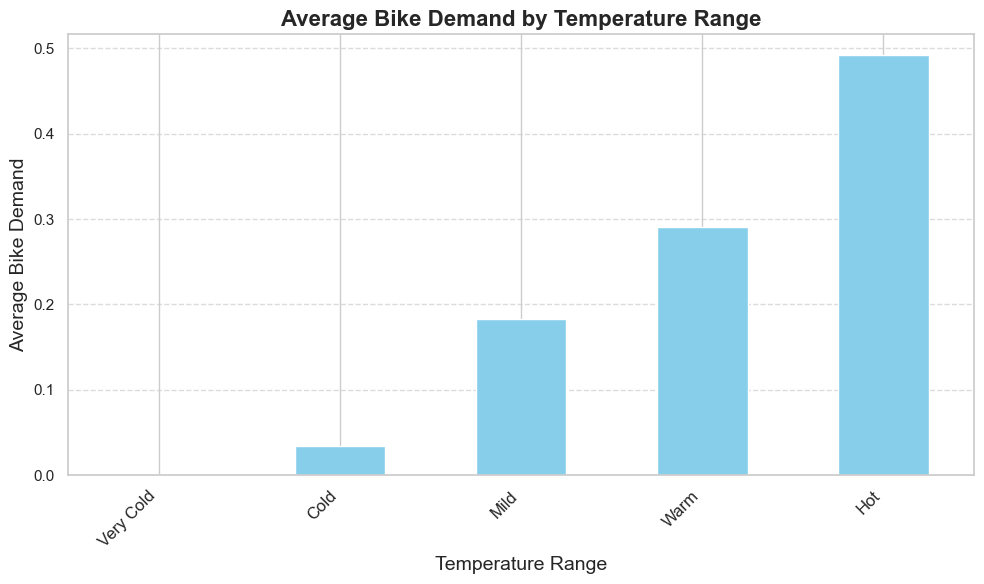

In [53]:
bin_labels = ['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']

sns.set(style="whitegrid")
ax = data.groupby('temp_binned', observed=False)['increase_stock'].mean().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Bike Demand by Temperature Range', fontsize=16, fontweight='bold')
plt.xlabel('Temperature Range', fontsize=14)
plt.ylabel('Average Bike Demand', fontsize=14)
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=45, ha='right', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hour_of_day                    1600 non-null   int64  
 1   day_of_week                    1600 non-null   int64  
 2   month                          1600 non-null   int64  
 3   holiday                        1600 non-null   int64  
 4   weekday                        1600 non-null   int64  
 5   summertime                     1600 non-null   int64  
 6   temp                           1600 non-null   float64
 7   dew                            1600 non-null   float64
 8   humidity                       1600 non-null   float64
 9   precip                         1600 non-null   float64
 10  snowdepth                      1600 non-null   float64
 11  windspeed                      1600 non-null   float64
 12  cloudcover                     1600 non-null   f

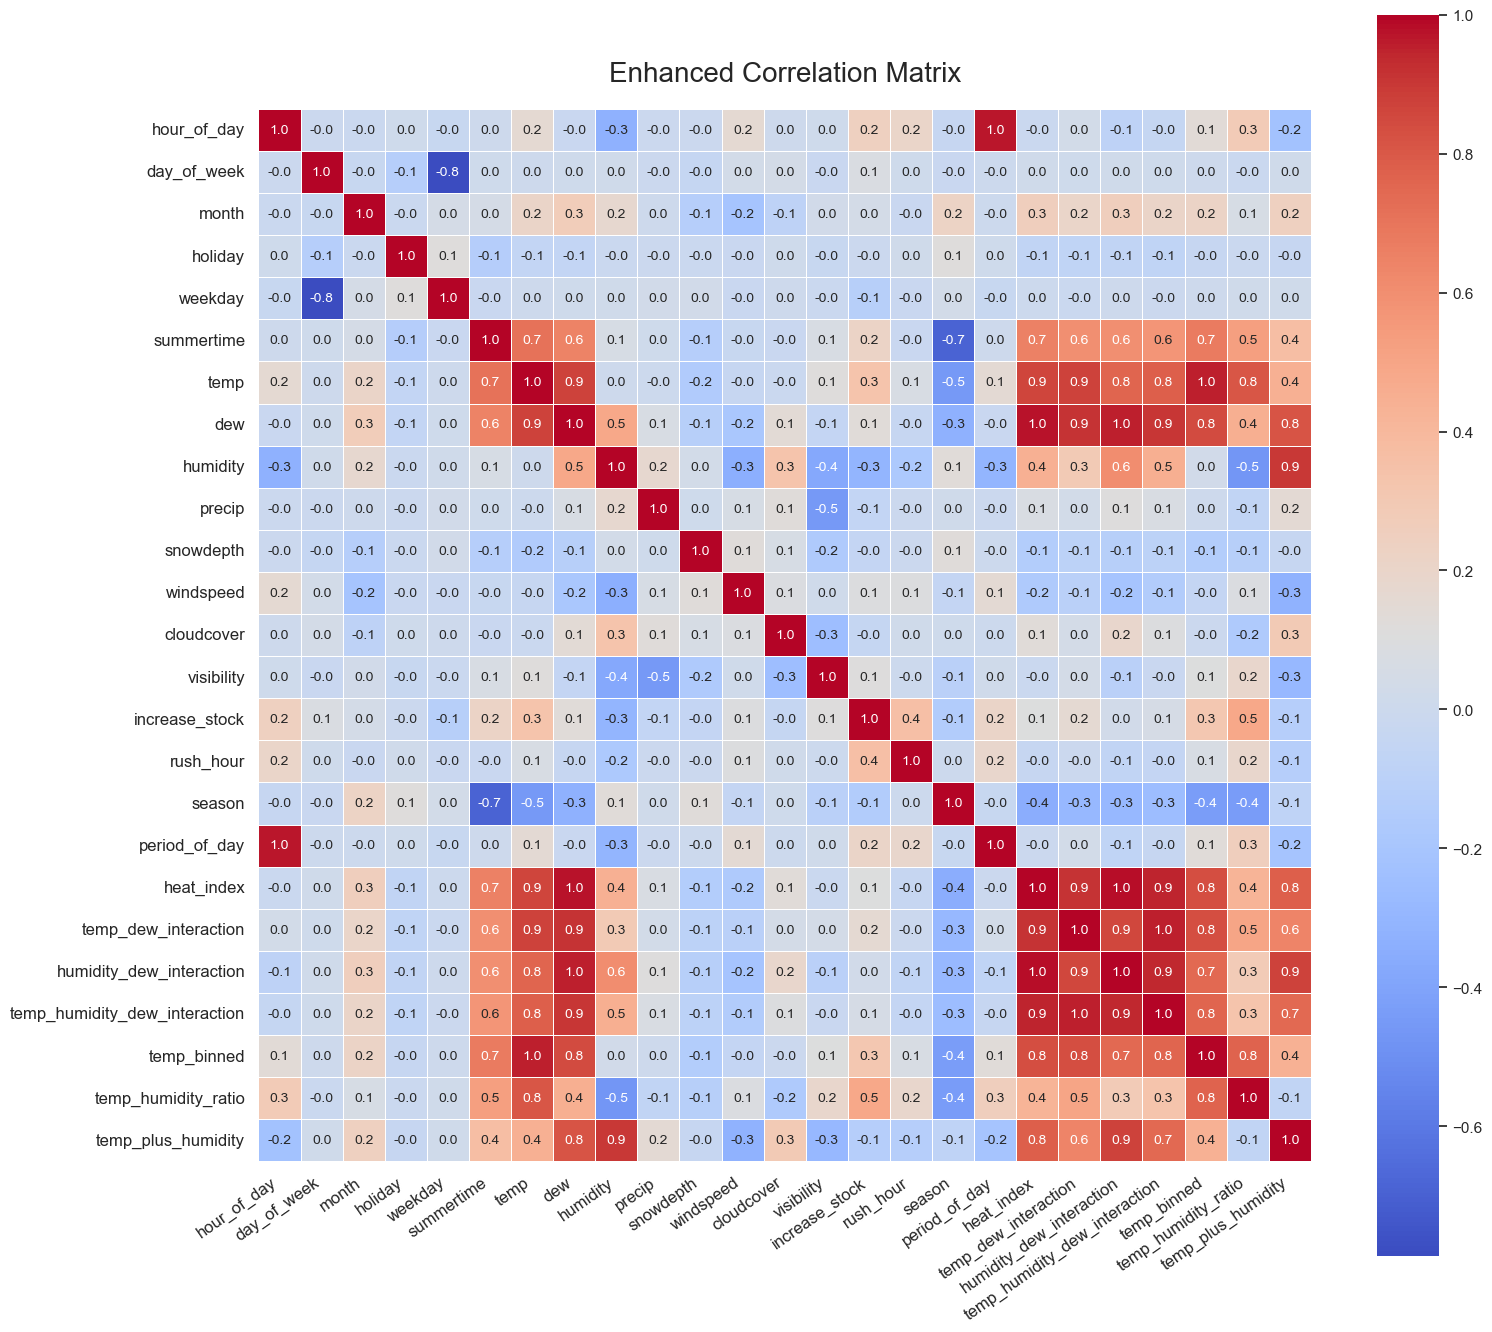

In [55]:
plt.figure(figsize=(16, 14))
sns.set(style="whitegrid")

correlation_matrix = data.corr()

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,         # Display the correlation coefficients
    fmt='.1f',          # Format of the annotation text
    cmap='coolwarm',    # Color palette
    cbar=True,          # Add a color bar
    square=True,        # Square-shaped cells
    linewidths=0.5,     # Add lines between cells
    annot_kws={"size": 10},  # Adjust font size of annotations
)

plt.title("Enhanced Correlation Matrix", fontsize=20, pad=20)
plt.xticks(fontsize=12, rotation=35, ha="right")
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

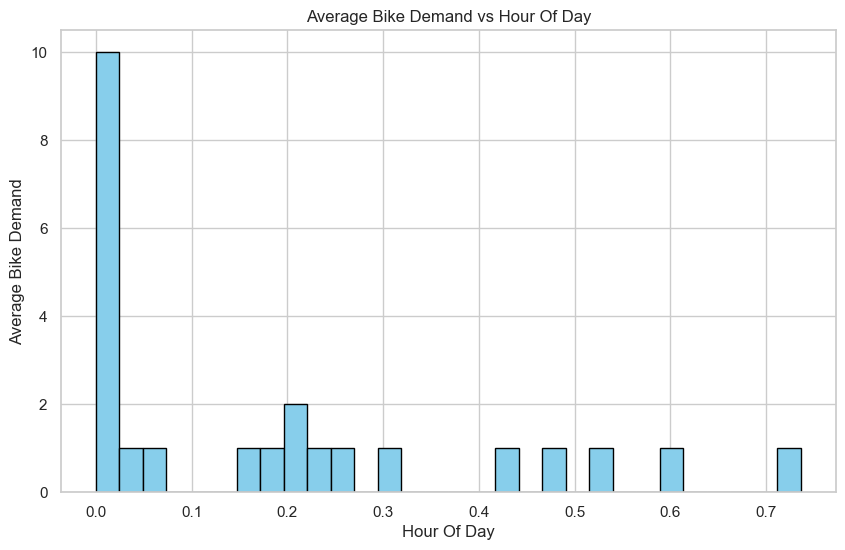

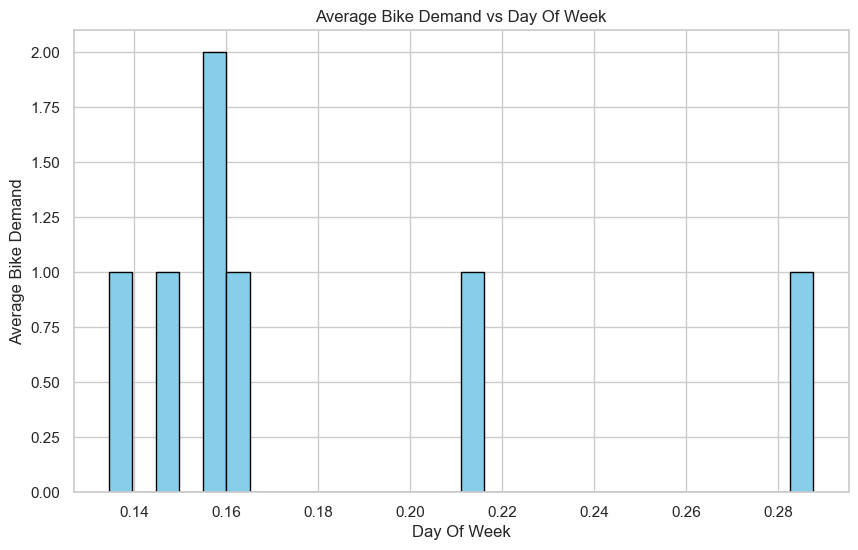

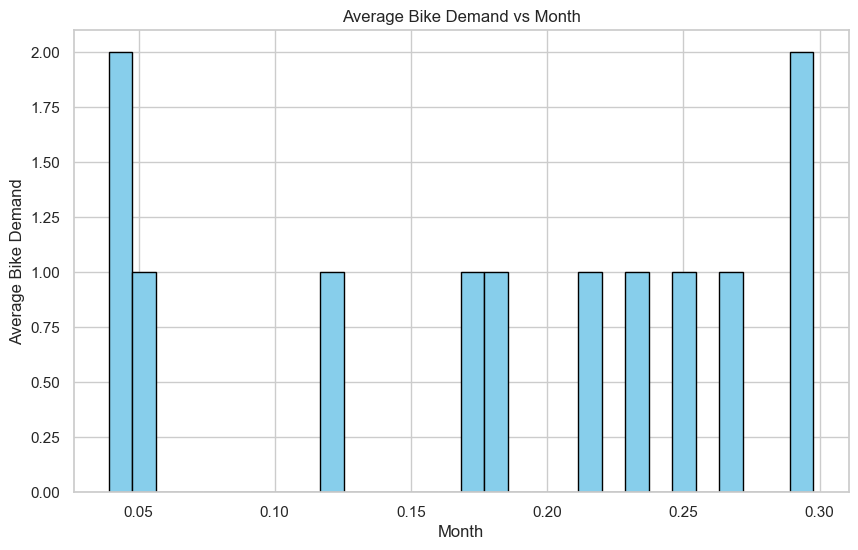

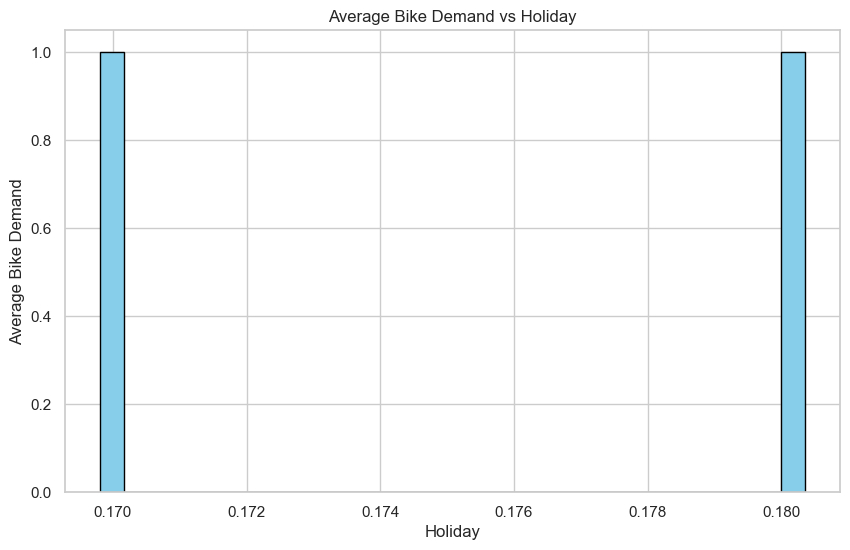

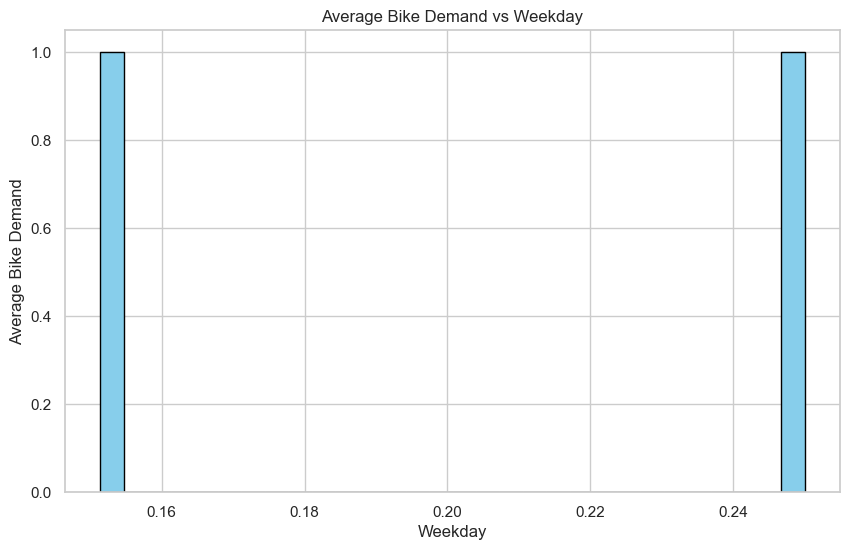

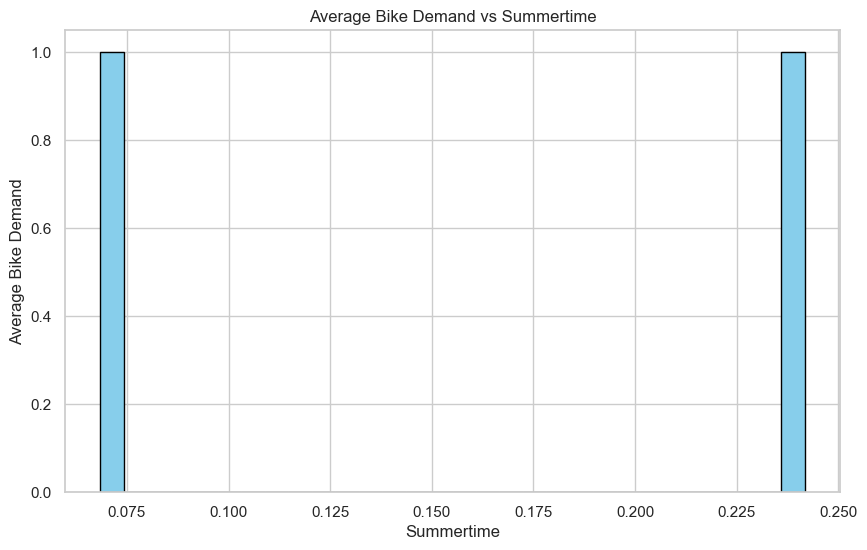

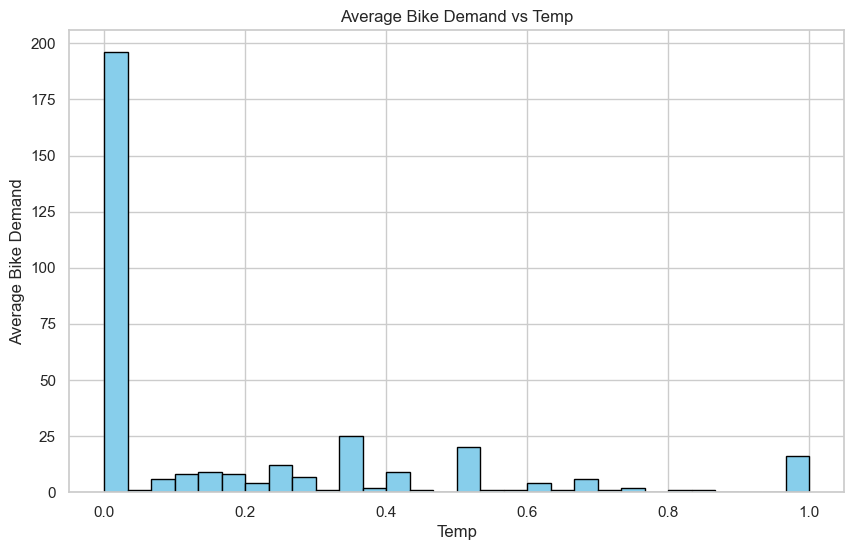

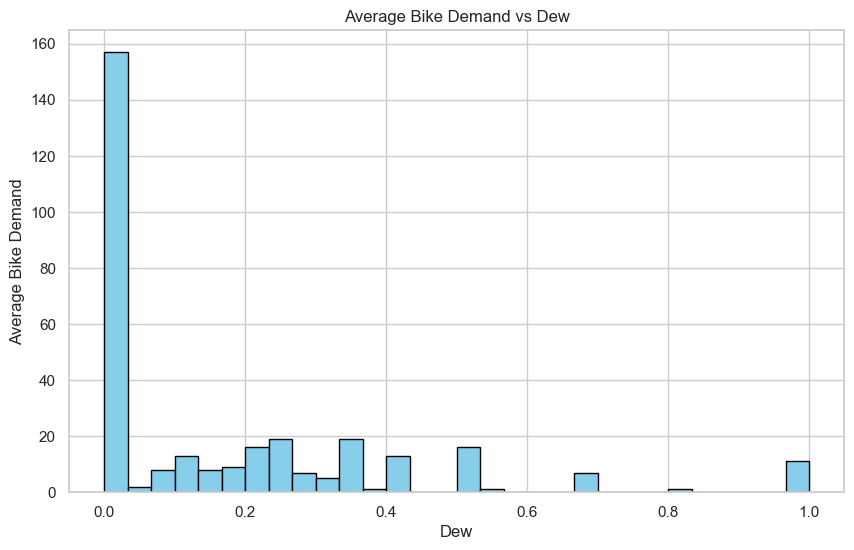

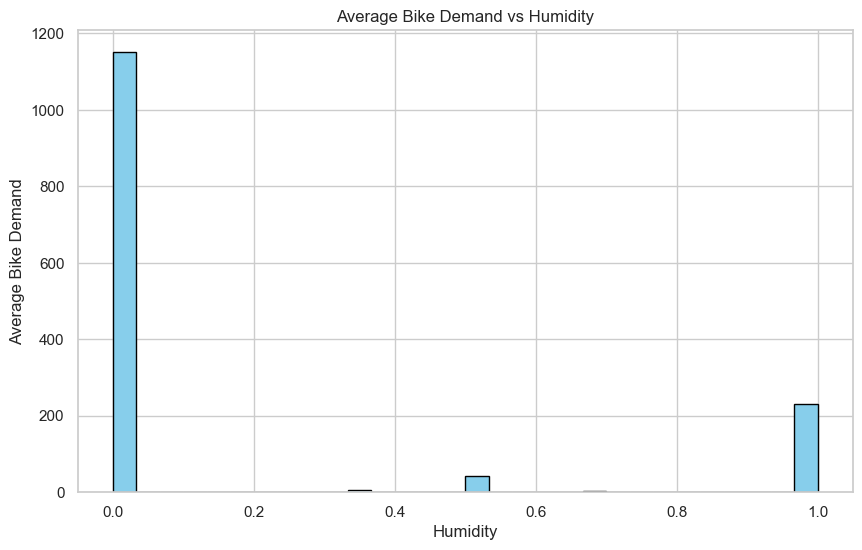

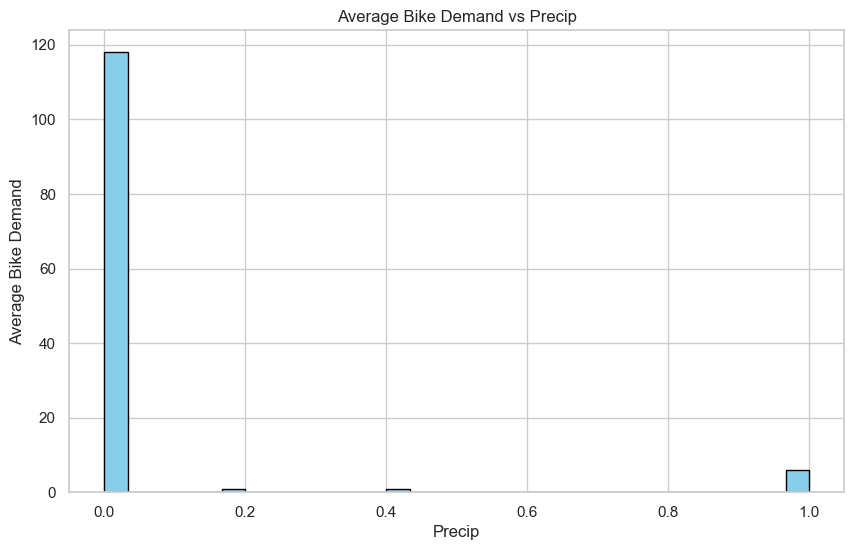

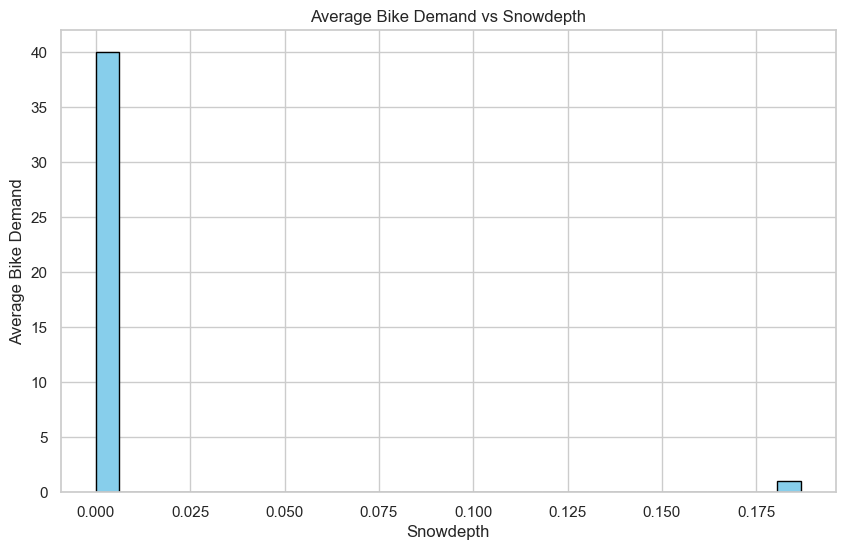

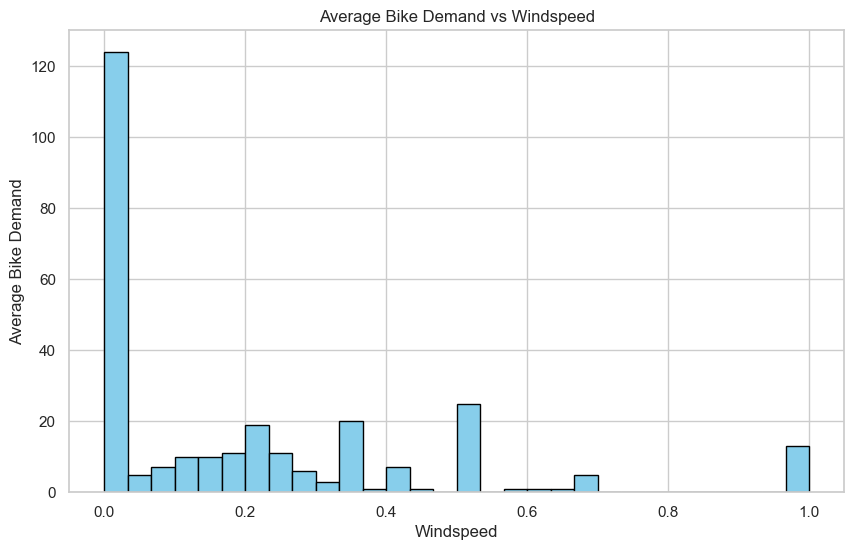

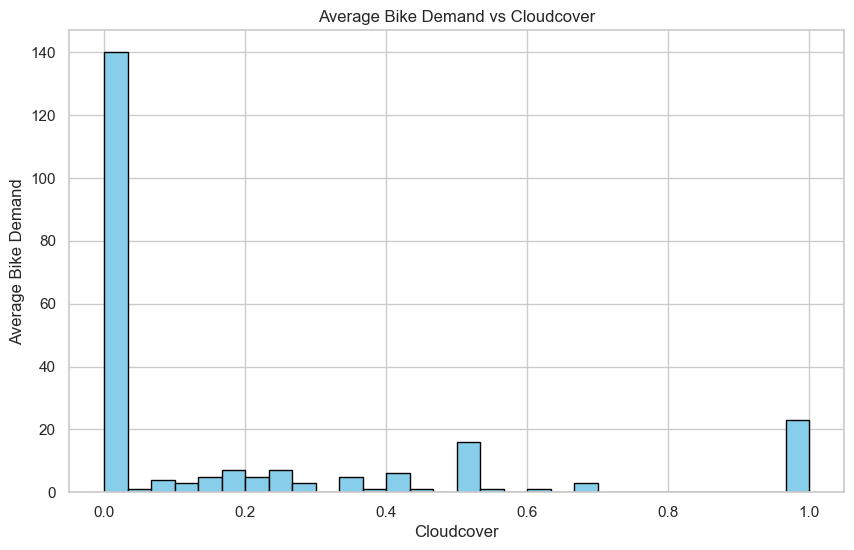

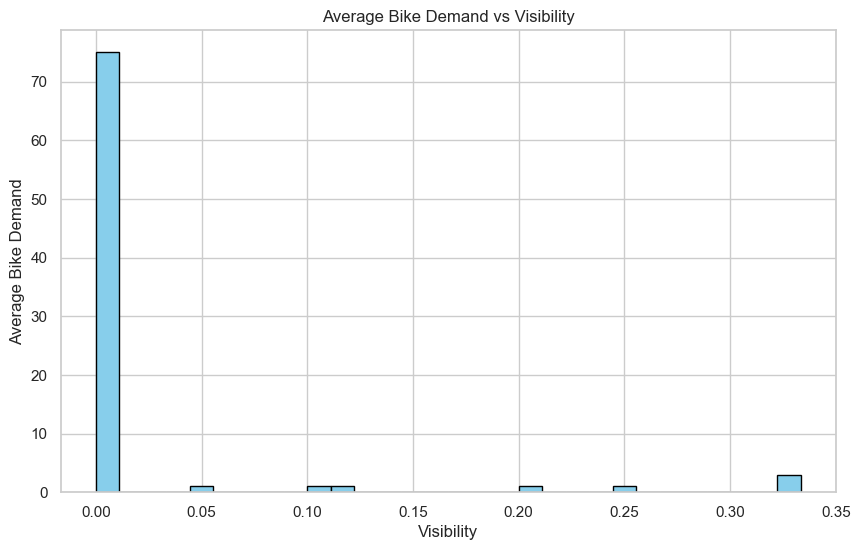

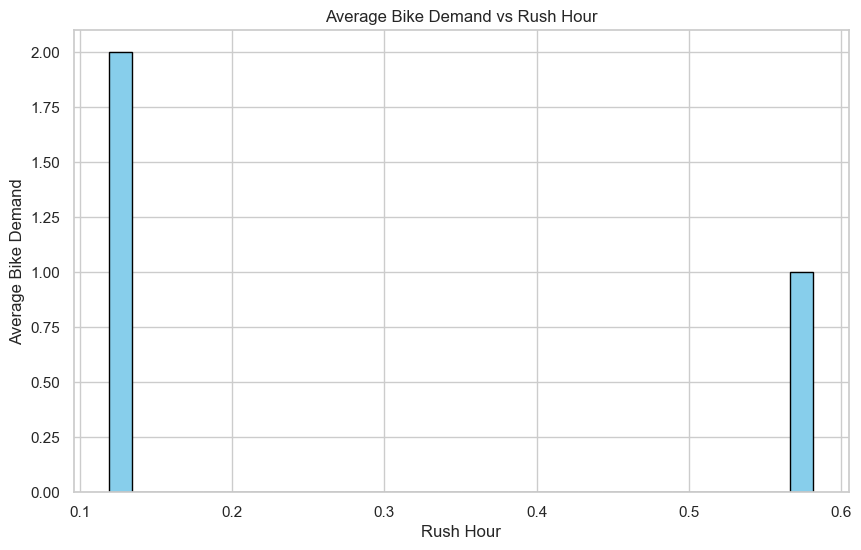

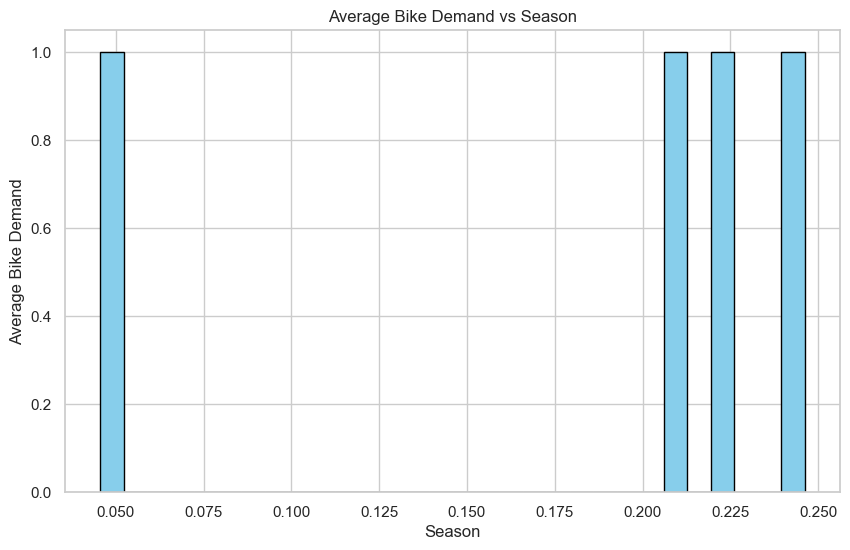

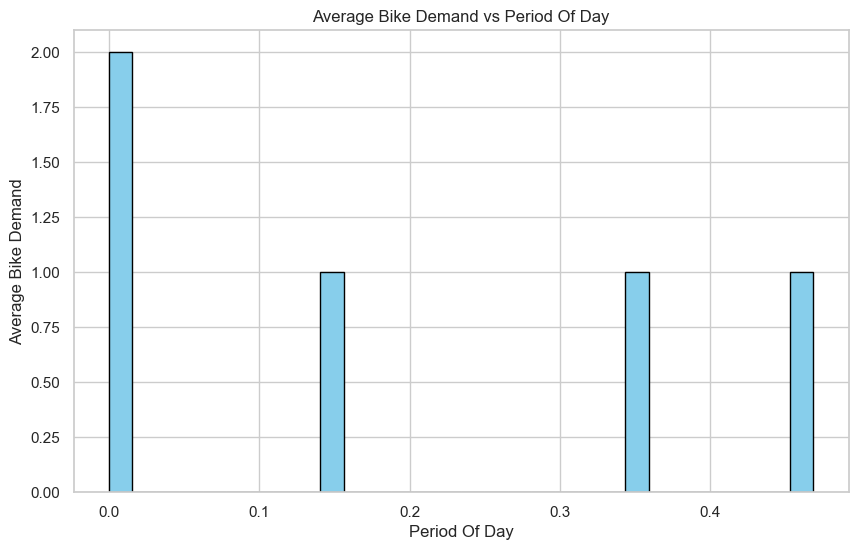

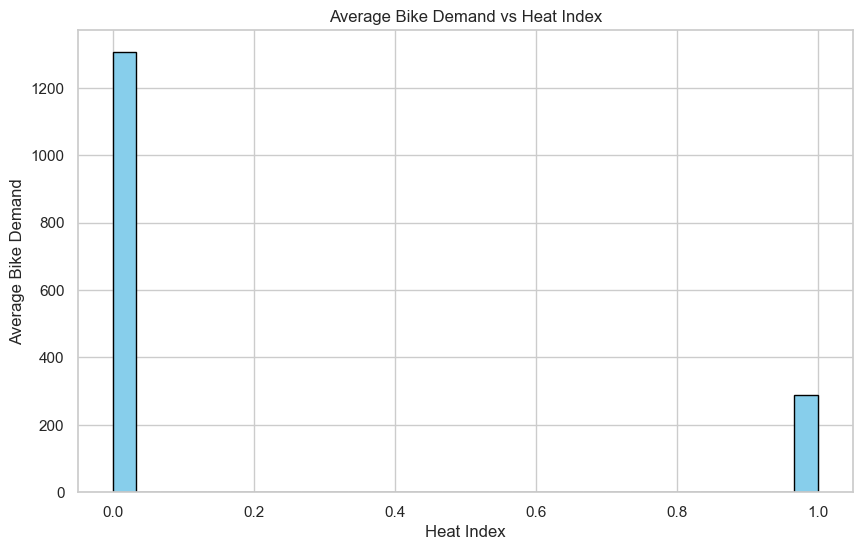

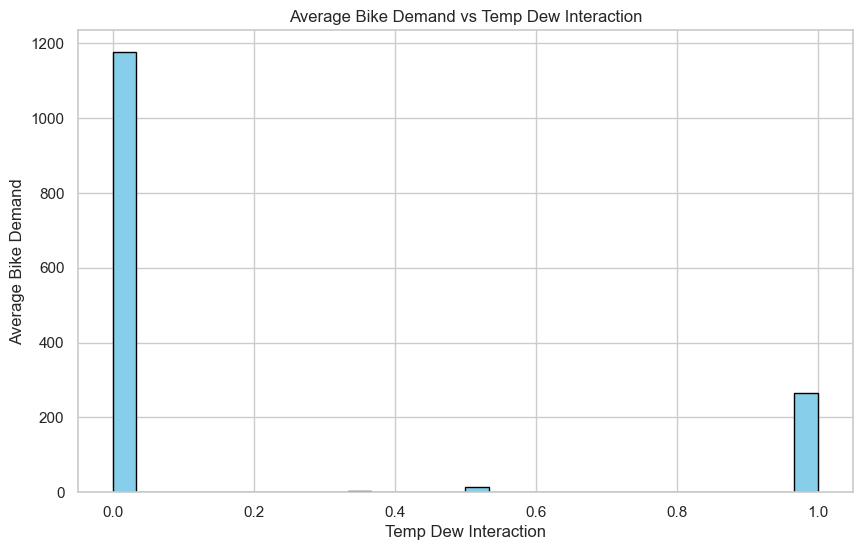

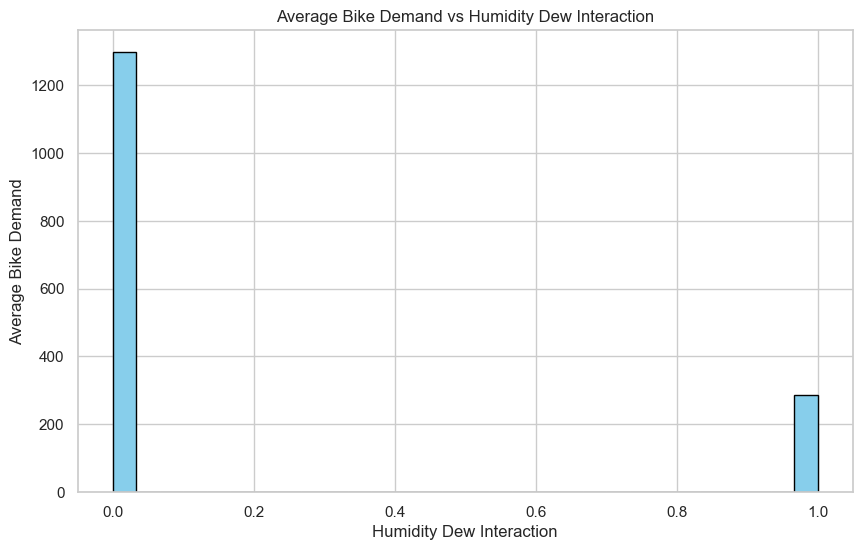

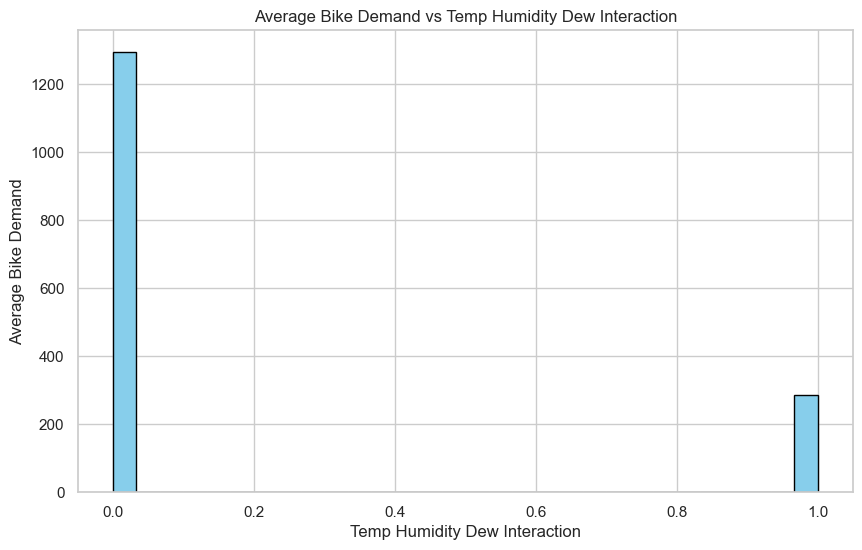

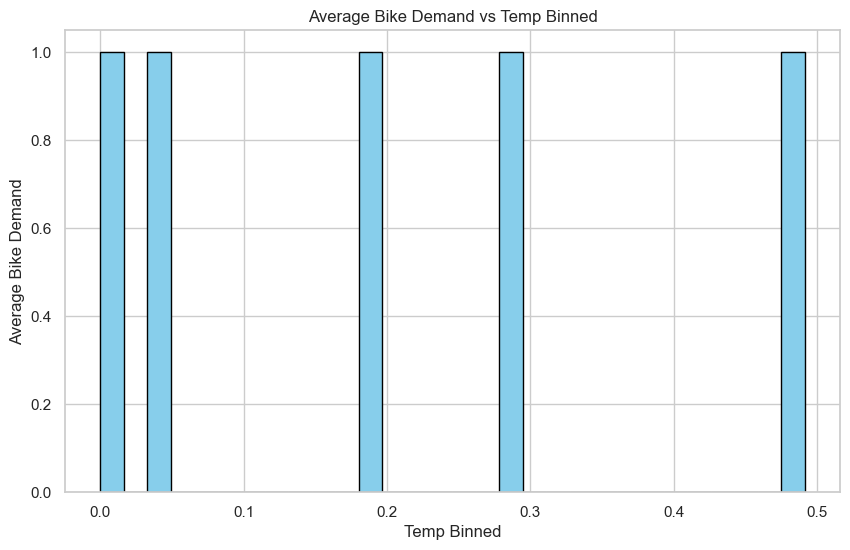

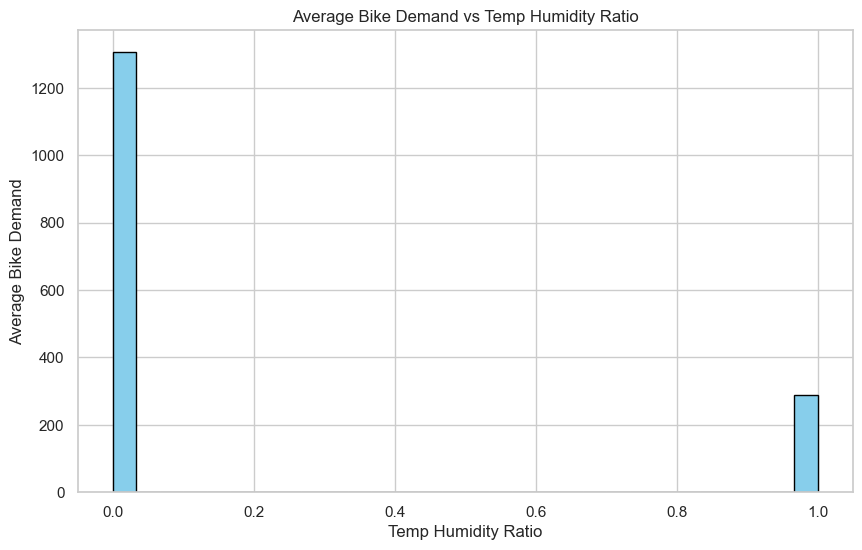

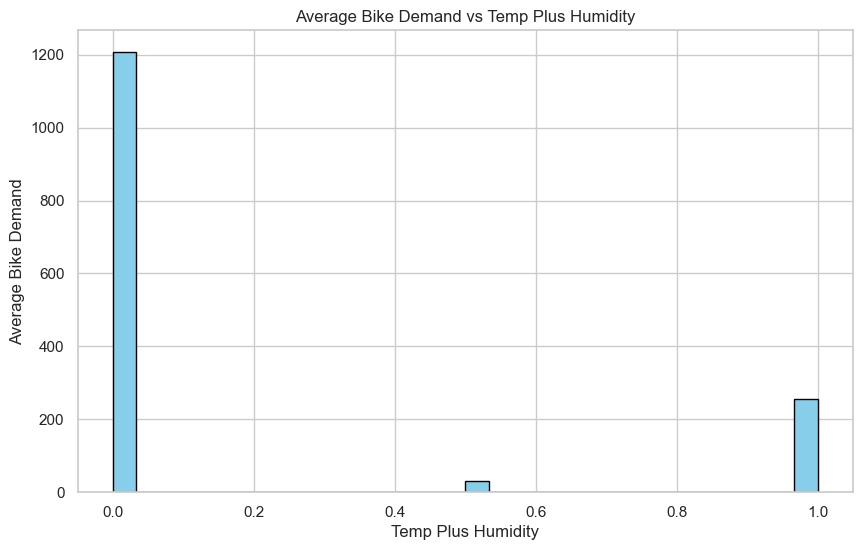

In [56]:
variables = [
    'hour_of_day', 'day_of_week', 'month', 'holiday', 'weekday', 'summertime',
    'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 
    'visibility', 'rush_hour', 'season', 'period_of_day', 'heat_index', 
    'temp_dew_interaction', 'humidity_dew_interaction', 'temp_humidity_dew_interaction', 
    'temp_binned', 'temp_humidity_ratio', 'temp_plus_humidity'
]

# Create histograms for each variable
for var in variables:
    avg_demand = data.groupby(var)['increase_stock'].mean()
    
    plt.figure(figsize=(10, 6))
    plt.hist(avg_demand, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Average Bike Demand vs {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Average Bike Demand')
    plt.grid(True)
    plt.show()


In [57]:
missing_data = data.isnull().sum()
print(missing_data)

hour_of_day                      0
day_of_week                      0
month                            0
holiday                          0
weekday                          0
summertime                       0
temp                             0
dew                              0
humidity                         0
precip                           0
snowdepth                        0
windspeed                        0
cloudcover                       0
visibility                       0
increase_stock                   0
rush_hour                        0
season                           0
period_of_day                    0
heat_index                       0
temp_dew_interaction             0
humidity_dew_interaction         0
temp_humidity_dew_interaction    0
temp_binned                      0
temp_humidity_ratio              0
temp_plus_humidity               0
dtype: int64


In [58]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)
y_train = train['increase_stock']
y_test = test['increase_stock']
X_train = train.drop(columns=['increase_stock'])
X_test = test.drop(columns=['increase_stock'])

In [59]:
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (1280, 24)
X_test Shape: (320, 24)
y_train Shape: (1280,)
y_test Shape: (320,)
